In [121]:
#EDDIE STOKES PYBER HOMEWORK

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# Display the data table for preview

In [123]:
pyberdata = pd.merge(ridedata, citydata, how="right")
groupedcity = pyberdata.groupby(["type", "city"])
avgfare = groupedcity["fare"].mean().round(2)
totalrides = groupedcity["ride_id"].count()
totaldrivers = groupedcity["driver_count"].sum() / totalrides

citydf = pd.DataFrame({"Average Fare ($) Per City":avgfare,
                             "Total Number of Rides Per City": totalrides,
                             "Total Number of Drivers Per City": totaldrivers})
citydf.head()

Average Fare ($) Per City  \
type  city                                        
Rural Bradshawfurt                        40.06   
      Garzaport                           24.12   
      Harringtonfort                      33.47   
      Jessicaport                         36.01   
      Lake Jamie                          34.36   

                      Total Number of Rides Per City  \
type  city                                             
Rural Bradshawfurt                                10   
      Garzaport                                    3   
      Harringtonfort                               6   
      Jessicaport                                  6   
      Lake Jamie                                   6   

                      Total Number of Drivers Per City  
type  city                                              
Rural Bradshawfurt                                 7.0  
      Garzaport                                    7.0  
      Harringtonfort                               4.0  
      Jessicaport                                  1.0  
      Lake Jamie                                   4.0

In [140]:
pyberdata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

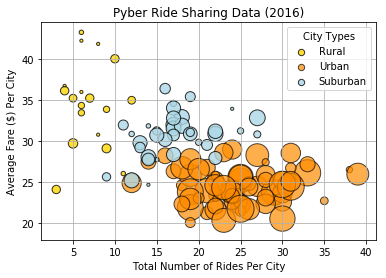

In [172]:
# Obtain the x and y coordinates for each of the three city types
urban = citydf.loc["Urban",:]
suburban = citydf.loc["Suburban",:]
rural = citydf.loc["Rural",:]

urbanrides = urban["Total Number of Rides Per City"]
urbanfares = urban["Average Fare ($) Per City"]
urbandrivers = urban["Total Number of Drivers Per City"]

subrides = suburban["Total Number of Rides Per City"]
subfares = suburban["Average Fare ($) Per City"]
subdrivers = suburban["Total Number of Drivers Per City"]

ruralrides = rural["Total Number of Rides Per City"]
ruralfares = rural["Average Fare ($) Per City"]
ruraldrivers = rural["Total Number of Drivers Per City"]

# Build the scatter plots for each city types
plt.scatter(ruralrides, ruralfares, s=ruraldrivers*10, marker="o", alpha=0.8, facecolors="gold", edgecolors="black")
plt.scatter(urbanrides, urbanfares, s=urbandrivers*10, marker="o", alpha=0.7, facecolors="darkorange", edgecolors="black")
plt.scatter(subrides, subfares, s=subdrivers*10, marker="o", alpha=0.8, facecolors="lightblue", edgecolors="black")

# Create a legend
lgnd = plt.legend(loc="best",labels=["Rural", "Urban", "Suburban"], title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([40])
    
# Incorporate a text label regarding circle size
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Save Figure
plt.savefig("../PyberBubbleChart.png")


## Total Fares by City Type

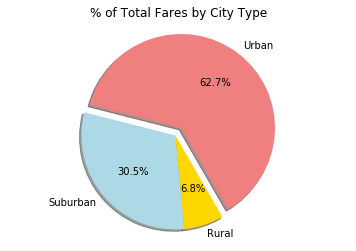

In [173]:
# Calculate Type Percents
totalfares = pyberdata["fare"].sum()

#get the percentages of each city type's total fares
urban_df = pyberdata.loc[pyberdata["type"] == "Urban"]
urban_fares = urban_df["fare"].sum()
urban_percent = (urban_fares/totalfares*100).round(1)

suburban_df = pyberdata.loc[pyberdata["type"] == "Suburban"]
suburban_fares = suburban_df["fare"].sum()
suburban_percent = (suburban_fares/totalfares*100).round(1)

rural_df = pyberdata.loc[pyberdata["type"] == "Rural"]
rural_fares = rural_df["fare"].sum()
rural_percent = (rural_fares/totalfares*100).round(1)

# Build Pie Chart
city_types = ["Urban", "Suburban", "Rural"]
type_percentages = [urban_percent, suburban_percent, rural_percent]
colors = ["lightcoral", "lightblue", "gold"]
explode = (0.1,0,0)

plt.pie(type_percentages, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)
plt.axis("equal")
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("../PyberTypePie.png")

## Total Rides by City Type

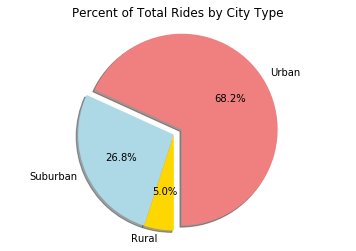

In [174]:
# Calculate Total rides
allrides = pyberdata["ride_id"].sum()

#get the percentages of each city type's total rides
urban_df = pyberdata.loc[pyberdata["type"] == "Urban"]
urban_rides = urban_df["ride_id"].sum()
UR_percent = (urban_rides/allrides*100).round(1)

suburban_df = pyberdata.loc[pyberdata["type"] == "Suburban"]
suburban_rides = suburban_df["ride_id"].sum()
SR_percent = (suburban_rides/allrides*100).round(1)

rural_df = pyberdata.loc[pyberdata["type"] == "Rural"]
rural_rides = rural_df["ride_id"].sum()
RR_percent = (rural_rides/allrides*100).round(1)

# Build Pie Chart
city_types = ["Urban", "Suburban", "Rural"]
rides_percentages = [UR_percent, SR_percent, RR_percent]
colors = ["lightcoral", "lightblue", "gold"]
explode = (0.1,0,0)

plt.pie(rides_percentages, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title("Percent of Total Rides by City Type")


# Save Figure
plt.savefig("../PyberRidesPie.png")

## Total Drivers by City Type

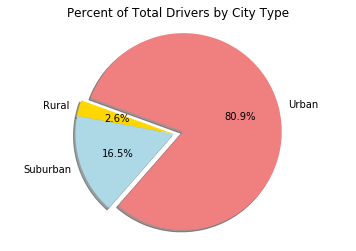

In [176]:
# Calculate total number of drivers
alldrivers = citydata.groupby(["type"])["driver_count"].sum()

# Build Pie Chart
city_types = ["Rural", "Suburban", "Urban"]
driver_percentages = [UD_percent, SD_percent, RD_percent]
colors = ["gold", "lightblue", "lightcoral"]
explode = (0,0,0.1)

plt.pie(alldrivers, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")
plt.title("Percent of Total Drivers by City Type")


# Save Figure
plt.savefig("../PyberDriverPie.png")

Observable Trends:

1. Rural cities have a much higher average fare cost, likely due to the significantly lower number of drivers and rides conducted

2. Even though urban cities account for 80% of all divers (compared to 16% in suburban cities), they only account for 62% of total fares, potentially suggesting that the rate (per capita) at which pyber is used in suburban cities, may be higher than in urban ones

3. Urban cities with a small amount of drivers (an amount equivalent to the rural city with the highest driver count), still has significantly more rides than any rural city